# LAB06 Assigment




### Exercise 1 Linear Discriminant Analysis from Scratch using numpy (50 points )
- <font size=4> Complete the missing code in the LDA class below<font>

In [175]:
from cv2 import transform
import numpy as np
import matplotlib.pyplot as plt


class LDA:
    #n_components:Number of components (<= min(n_classes - 1, n_features)) for dimensionality reduction.
    def __init__(self, n_components=None):
        
        self.n_components = n_components
        self.eigenvalues = None
        self.eigenvectors = None
        self.idx = None
    

    def fit(self, X, y):
        
        if self.n_components is None or self.n_components > X.shape[1]:
            n_components = X.shape[1]
        else:
            n_components = self.n_components
       
        n_features = np.shape(X)[1]
        # the number of classes
        labels = np.unique(y)
        
        
        # Within class scatter matrix
        # Complete code for calculating S_W
        ########### Write Your Code Here ###########
        S_w = np.zeros((n_features, n_features))
        print(labels)
        for _ in range(len(labels)):
            
            x_one_class = X[y == y[_]]
            
            x_mean = np.mean(x_one_class, axis=0)

            S_one_class = (x_one_class - x_mean).T @ (x_one_class - x_mean)
            
            S_w += S_one_class
        print(S_w.shape)

        # Between class scatter matrix
        # Complete code for calculating S_B
        ########### Write Your Code Here ###########
        S_B = np.zeros((n_features, n_features))
        x_mean = np.mean(X, axis=0)
        for _ in range(len(labels)):
            print(_)
            x_one_class = X[y == y[_]]
            N = x_one_class.shape[0]
            x_mean_one_class = np.mean(x_one_class, axis=0)
            S_B += N * (x_mean_one_class - x_mean).T @ (x_mean_one_class - x_mean)
        print(S_B.shape)
        # Determine SW^-1 * SB by calculating inverse of SW
        ########### Write Your Code Here ###########
        S_w_inv = np.linalg.inv(S_w)
        
        S_w_inv_S_B = S_w_inv @ S_B
        # Get eigenvalues and eigenvectors of SW^-1 * SB
        ########### Write Your Code Here ###########
        
        eigenvalues, eigenvectors = np.linalg.eig(S_w_inv_S_B)
        # Sort the eigenvalues and corresponding eigenvectors from largest
        # to smallest eigenvalue and select the first n_components
        self.idx = eigenvalues.argsort()[::-1]

        print(self.idx)

        eigenvalues = eigenvalues[self.idx][:n_components]
        eigenvectors = eigenvectors[:, self.idx][:, :n_components]
    
        self.eigenvalues = eigenvalues
        self.eigenvectors = eigenvectors
  
    def fit_transform(self, X, y):
        self.fit(X, y)

        
        return self.transform(X) 
  
    def transform(self, X):
        ########### Write Your Code Here ###########
        
        print("eigenvectors")
        print(self.eigenvectors.shape)
        print("x")
        print(X.shape)
        return X @ self.eigenvectors  

In [162]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10, n_features=10, n_informative=10, n_redundant=0, random_state=1)
row = [[0.12777556,-3.64400522,-2.23268854,-1.82114386,1.75466361,0.1243966,1.03397657,2.35822076,1.01001752,0.56768485],
[0.12777556,-3.64400522,-2.23268854,-1.82114386,1.75466361,0.1243966,1.03397657,2.35822076,1.01001752,0.56768485]
]
idx = [2,3 ,9, 7 ,8, 5, 6 ,4, 0, 1]
row = np.array(row)

# define model
model = LDA(5)
# fit model
model.fit(X, y)
print(model.transform(row))




[0 1]
(10, 10)
0
1
(10, 10)
[2 3 9 7 8 5 6 4 0 1]
eigenvectors
(10, 5)
x
(2, 10)
[[-0.84082276-2.77734064j -0.84082276+2.77734064j  0.99970602+0.j
  -0.17540838-0.47459748j -0.17540838+0.47459748j]
 [-0.84082276-2.77734064j -0.84082276+2.77734064j  0.99970602+0.j
  -0.17540838-0.47459748j -0.17540838+0.47459748j]]


- <font size=4> Dimensionality reduction visualization<font>

[0 1 2]
(4, 4)
0
1
2
(4, 4)
[1 2 0 3]
eigenvectors
(4, 3)
x
(150, 4)


/tmp/ipykernel_30045/2010495300.py:32: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_ticklabels([])
/tmp/ipykernel_30045/2010495300.py:33: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_yaxis.set_ticklabels([])
/tmp/ipykernel_30045/2010495300.py:34: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_zaxis.set_ticklabels([])
/tmp/ipykernel_30045/2010495300.py:40: MatplotlibDeprecationWarning: The dist attribute was deprecated in Matplotlib 3.6 and will be removed two minor releases later.
  ax.dist = 12


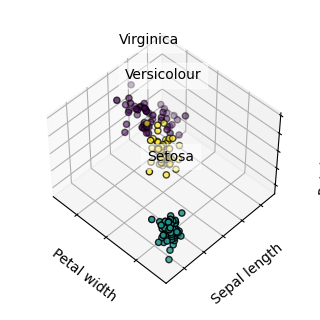

In [176]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets

np.random.seed(5)


iris = datasets.load_iris()
X = iris.data
y = iris.target
pca = LDA(n_components=3)
pca.fit(X, y)
X = pca.transform(X)

fig = plt.figure(1, figsize=(4, 3))
ax = fig.add_subplot(111, projection="3d", elev=48, azim=134)
ax.set_position([0, 0, 0.95, 1])
for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:    
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean(),
        X[y == label, 2].mean() + 2,
        name,
        horizontalalignment="center",
        bbox=dict(alpha=0.5, edgecolor="w", facecolor="w"),
    )
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, 
        edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel("Petal width")
ax.set_ylabel("Sepal length")
ax.set_zlabel("Petal length")
# ax.set_title("Ground Truth")
ax.dist = 12

plt.show()

### Exercise 2 Recognize handwritten numbers with LDA (50 points ). 

Your task in this section is to recognize handwritten numbers, and you can use the linear discriminant analysis model from the Scikit-Learn library to fit, evaluate, and predict them.

<font color='red' size=4>Note that your accuracy in this section will directly determine your score.</font>

### Loading the MNIST Dataset


In [180]:
########### Write Your Code Here ###########
from sklearn.datasets import load_digits
digits = datasets.load_digits()
digits.data.shape

############################################

(1797, 64)

###  Visualization of MINIST

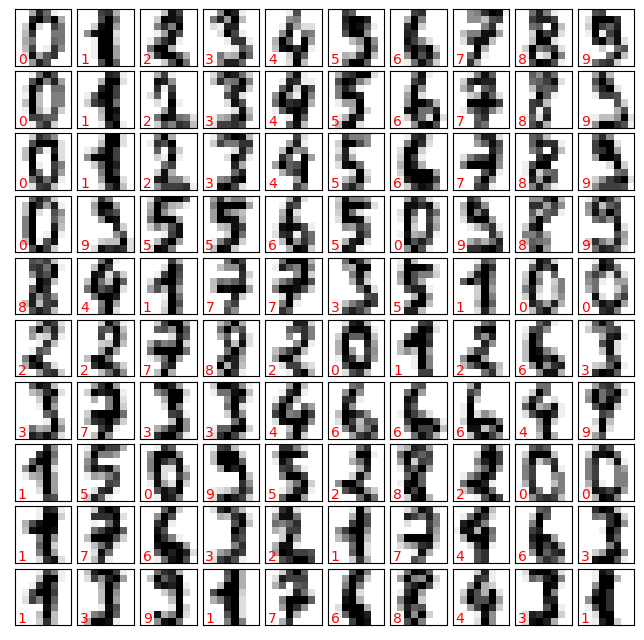

In [181]:
# Visualize MINIST
########### Write Your Code Here ###########
fig, axes = plt.subplots(10,10, figsize=(8, 8),subplot_kw={'xticks':[], 'yticks':[]},
                        gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),transform=ax.transAxes, color='r')
############################################

### Fit  Model

In [193]:
########### Write Your Code Here ###########
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
x = digits.data
y = digits.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, shuffle= True)

clf = LinearDiscriminantAnalysis(solver='svd')
clf.fit(x_train, y_train)
print(clf.score(x_test, y_test))

params = {  'solver':('lsqr', 'eigen')
            ,'shrinkage':[*np.linspace(0,1,100)]
}

GS = GridSearchCV(clf, param_grid = params, cv= 10, n_jobs= -1)
GS.fit(x_train,y_train)
print(GS.best_params_)
print(GS.best_score_)


############################################

0.9527777777777777
{'shrinkage': 0.23232323232323235, 'solver': 'lsqr'}
0.9547688422688422


## Evaluate model

In [194]:
########### Write Your Code Here ###########
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
model = LinearDiscriminantAnalysis(solver='lsqr', shrinkage= 0.23232323232323235)
model.fit(x_train,y_train)
y_predic = model.predict(x_test)
print("Confusion Matrix")
print(confusion_matrix(y_test, y_predic))
print("ACC RECALL F1")
print(classification_report(y_test, y_predic))



Confusion Matrix
[[32  0  0  0  0  0  0  0  0  0]
 [ 0 28  1  0  0  0  0  0  0  0]
 [ 0  0 36  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  2  0  0  2  0]
 [ 0  0  0  0 36  0  0  1  0  0]
 [ 0  0  0  0  0 37  0  0  0  3]
 [ 0  1  0  0  1  0 30  0  0  0]
 [ 0  0  0  0  0  0  0 37  0  0]
 [ 0  0  0  0  0  0  0  1 37  0]
 [ 0  0  0  0  0  0  0  0  1 41]]
ACC RECALL F1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        32
           1       0.97      0.97      0.97        29
           2       0.97      1.00      0.99        36
           3       1.00      0.89      0.94        37
           4       0.97      0.97      0.97        37
           5       0.95      0.93      0.94        40
           6       1.00      0.94      0.97        32
           7       0.95      1.00      0.97        37
           8       0.93      0.97      0.95        38
           9       0.93      0.98      0.95        42

    accuracy                           0.9

### Exercise 3: Qustions

#### Q1:What are the advantages and disadvantages of LDA?

**advantages**：

1. 计算速度快

2. LDA在样本分类信息依赖均值而不是方差的时候表现较好，因为其假设原始数据根据样本均值进行分类、原始数据根据样本均值进行分类。

3. LDA为有监督学习，比起PCA可以利用LABEL即类别的先验知识



**disadvantages**：

1. LDA降维最多降到类别数K-1的维数

2. LDA在样本分类信息依赖方差而不是均值的时候降维效果不好。

3. LDA可能存在对于数据的overfitting。

3. #### \- Q2 LDA can be used for dimensionality reduction, so can PCA. Please tell the difference between them?

**Difference**

1. LDA是有监督的降维方法，而PCA是无监督的降维方法
2. LDA降维最多降到类别数K-1的维数，而PCA没有这个限制
3. LDA除了可以用于降维，还可以用于分类
4. LDA假设原始数据根据样本均值进行分类，主要根据均值分类，而PCA主要根据方差分类
   
   